# Comparing Cryptos within Asset Class 

In [124]:
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [125]:
print(f"Current working directory:{Path.cwd()}")

Current working directory:/Users/aalfiler/Sites/project1_git_repo/Project_1/notebooks


In [1]:
all_crypto = pd.ExcelFile('/Users/aalfiler/Sites/project1_git_repo/Project_1/data/CoinMarketCap_18JAN2020-close.xlsx')
all_close = pd.read_excel(all_crypto, 'All')

NameError: name 'Path' is not defined

In [127]:
all_close.head()

,Date,Bitcoin-BTC,Ethereum-ETH,Bitcoin-BSV,Litecoin-LTC,Monero-XMR,Dash-DASH,Kusama-KSM,Zcash-ZEC,Bitcoin Cash-BCH,Counos-CCXX
0,2021-01-01,32127.27,774.53,163.09,136.94,143.12,86.97,69.50,56.79,341.99,88.27
1,2020-12-31,29374.15,730.37,163.12,126.23,136.05,88.24,71.96,63.99,343.05,89.10
2,2020-12-30,29001.72,737.80,163.63,124.69,156.57,99.61,62.04,64.20,358.81,87.88
3,2020-12-29,28840.95,751.62,166.90,129.47,159.37,101.68,61.26,66.54,353.09,87.67
4,2020-12-28,27362.44,731.52,164.40,129.04,161.39,104.04,58.24,69.02,362.09,87.39


In [128]:
all_close.shape

(2806, 11)

In [101]:
all_close.dtypes

Date                datetime64[ns]
Bitcoin-BTC                float64
Ethereum-ETH               float64
Bitcoin-BSV                float64
Litecoin-LTC               float64
Monero-XMR                 float64
Dash-DASH                  float64
Kusama-KSM                 float64
Zcash-ZEC                  float64
Bitcoin Cash-BCH           float64
Counos-CCXX                float64
dtype: object

In [129]:
all_close.isnull().sum()

Date                   0
Bitcoin-BTC            0
Ethereum-ETH         831
Bitcoin-BSV         2021
Litecoin-LTC           0
Monero-XMR           389
Dash-DASH            292
Kusama-KSM          2420
Zcash-ZEC           1281
Bitcoin Cash-BCH    1548
Counos-CCXX         2550
dtype: int64

In [ ]:
all_close["Bitcoin-BTC"] = all_close["Bitcoin-BTC"].fillna(0)

In [ ]:
all_close["Ethereum-ETH"] = all_close["Ethereum-ETH"].fillna(0)

In [ ]:
all_close["Bitcoin-BSV"] = all_close["Bitcoin-BSV"].fillna(0)

In [ ]:
all_close["Litecoin-LTC"] = all_close["Litecoin-LTC"].fillna(0)

In [ ]:
all_close["Monero-XMR"] = all_close["Monero-XMR"].fillna(0)

In [ ]:
all_close["Dash-DASH"] = all_close["Dash-DASH"].fillna(0)

In [ ]:
all_close["Kusama-KSM"] = all_close["Kusama-KSM"].fillna(0)

In [ ]:
all_close["Zcash-ZEC"] = all_close["Zcash-ZEC"].fillna(0)

In [ ]:
all_close["Bitcoin Cash-BCH"] = all_close["Bitcoin Cash-BCH"].fillna(0)

In [ ]:
all_close["Counos-CCXX"] = all_close["Counos-CCXX"].fillna(0)

In [141]:
all_close.isnull().sum()

Date                0
Bitcoin-BTC         0
Ethereum-ETH        0
Bitcoin-BSV         0
Litecoin-LTC        0
Monero-XMR          0
Dash-DASH           0
Kusama-KSM          0
Zcash-ZEC           0
Bitcoin Cash-BCH    0
Counos-CCXX         0
dtype: int64

In [143]:
all_date_index = all_close.set_index("Date")
all_date_index.head()

,Bitcoin-BTC,Ethereum-ETH,Bitcoin-BSV,Litecoin-LTC,Monero-XMR,Dash-DASH,Kusama-KSM,Zcash-ZEC,Bitcoin Cash-BCH,Counos-CCXX
Date,,,,,,,,,,
2021-01-01,32127.27,774.53,163.09,136.94,143.12,86.97,69.50,56.79,341.99,88.27
2020-12-31,29374.15,730.37,163.12,126.23,136.05,88.24,71.96,63.99,343.05,89.10
2020-12-30,29001.72,737.80,163.63,124.69,156.57,99.61,62.04,64.20,358.81,87.88
2020-12-29,28840.95,751.62,166.90,129.47,159.37,101.68,61.26,66.54,353.09,87.67
2020-12-28,27362.44,731.52,164.40,129.04,161.39,104.04,58.24,69.02,362.09,87.39


In [144]:
all_date_index.shape

(2806, 10)

In [145]:
# Group then plot closing prices
all_date_index_grp = all_date_index.groupby([all_date_index.index.year]).mean()

In [146]:
all_date_index_grp

,Bitcoin-BTC,Ethereum-ETH,Bitcoin-BSV,Litecoin-LTC,Monero-XMR,Dash-DASH,Kusama-KSM,Zcash-ZEC,Bitcoin Cash-BCH,Counos-CCXX
Date,,,,,,,,,,
2013,260.043710,0.000000,0.000000,6.748347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014,525.984082,0.000000,0.000000,9.784986,0.951736,3.241430,0.000000,0.000000,0.000000,0.000000
2015,272.782384,0.374712,0.000000,2.696932,0.490705,2.762110,0.000000,0.000000,0.000000,0.000000
2016,570.033197,9.797840,0.000000,3.791475,3.725023,8.065628,0.000000,30.250519,0.000000,0.000000
2017,4040.715452,226.009726,0.000000,50.646986,76.847452,251.139918,0.000000,193.241973,394.454630,0.000000
2018,7545.412082,481.776767,13.727890,105.236411,167.192466,335.003370,0.000000,228.870932,865.525014,0.000000
2019,7404.442932,181.742795,109.121589,69.694438,66.484110,96.388740,0.074712,56.539425,261.375123,0.000000
2020,11176.962514,309.181066,193.752432,56.473689,85.190191,82.024754,17.360656,57.109590,270.211120,25.014863
2021,32127.270000,774.530000,163.090000,136.940000,143.120000,86.970000,69.500000,56.790000,341.990000,88.270000


In [193]:
all_date_index_grp.hvplot(title="CoinMarketCap: Crypto Closing Prices", ylabel="Closing Price", xlabel="Year", kind='line', width=1000, height=500, x="Date")

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [192]:
# Bar plot showing the total closing cost per day
all_date_index_grp.hvplot.bar(x='Date', y=["Bitcoin-BTC", "Ethereum-ETH", "Bitcoin-BSV", "Litecoin-LTC", "Monero-XMR", "Dash-DASH", "Kusama-KSM", "Zcash-ZEC", "Bitcoin Cash-BCH", "Counos-CCXX"],
                 stacked=True, rot=90, width=1000, height=450, ylabel="Closing Price", xlabel="Year", title="CoinMarketCap: Combined Closing Prices")

:Bars   [Date,Variable]   (value)

,Bitcoin-BTC,Ethereum-ETH,Bitcoin-BSV,Litecoin-LTC,Monero-XMR,Dash-DASH,Kusama-KSM,Zcash-ZEC,Bitcoin Cash-BCH,Counos-CCXX
count,2806.000000,2806.000000,2806.000000,2806.000000,2806.000000,2806.000000,2806.000000,2806.000000,2806.000000,2806.000000
mean,4140.814868,157.639262,41.310242,39.472341,52.228742,101.345521,2.298920,73.677366,233.262206,3.294266
std,4759.197098,219.938862,74.252435,49.927914,74.040425,180.689481,8.784631,122.517890,426.711522,12.754048
min,68.430000,0.000000,0.000000,1.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,417.952500,0.000000,0.000000,3.722500,0.517400,2.812500,0.000000,0.000000,0.000000,0.000000
50%,1080.240000,18.485000,0.000000,20.750000,13.965000,40.015000,0.000000,36.215000,0.000000,0.000000
75%,7562.717500,235.830000,66.840000,57.320000,82.230000,108.215000,0.000000,74.890000,296.220000,0.000000
max,32127.270000,1396.420000,422.740000,358.340000,469.200000,1550.850000,71.960000,1624.580000,3923.070000,89.100000


In [150]:
# Calculate the correlation between cryptos
correlation = all_date_index.corr() 
correlation

,Bitcoin-BTC,Ethereum-ETH,Bitcoin-BSV,Litecoin-LTC,Monero-XMR,Dash-DASH,Kusama-KSM,Zcash-ZEC,Bitcoin Cash-BCH,Counos-CCXX
Bitcoin-BTC,1.000000,0.802643,0.662956,0.774062,0.770519,0.554164,0.603554,0.459722,0.621100,0.619949
Ethereum-ETH,0.802643,1.000000,0.259169,0.905758,0.952817,0.843580,0.345065,0.778993,0.863360,0.341637
Bitcoin-BSV,0.662956,0.259169,1.000000,0.271062,0.203162,-0.027780,0.469468,-0.061608,0.064800,0.467518
Litecoin-LTC,0.774062,0.905758,0.271062,1.000000,0.950945,0.881168,0.150989,0.742872,0.895635,0.156879
Monero-XMR,0.770519,0.952817,0.203162,0.950945,1.000000,0.921079,0.212144,0.793076,0.934865,0.211878
Dash-DASH,0.554164,0.843580,-0.027780,0.881168,0.921079,1.000000,-0.025326,0.853166,0.953244,-0.023257
Kusama-KSM,0.603554,0.345065,0.469468,0.150989,0.212144,-0.025326,1.000000,-0.019154,0.021716,0.923041
Zcash-ZEC,0.459722,0.778993,-0.061608,0.742872,0.793076,0.853166,-0.019154,1.000000,0.796521,-0.020172
Bitcoin Cash-BCH,0.621100,0.863360,0.064800,0.895635,0.934865,0.953244,0.021716,0.796521,1.000000,0.022352
Counos-CCXX,0.619949,0.341637,0.467518,0.156879,0.211878,-0.023257,0.923041,-0.020172,0.022352,1.000000


<AxesSubplot:>

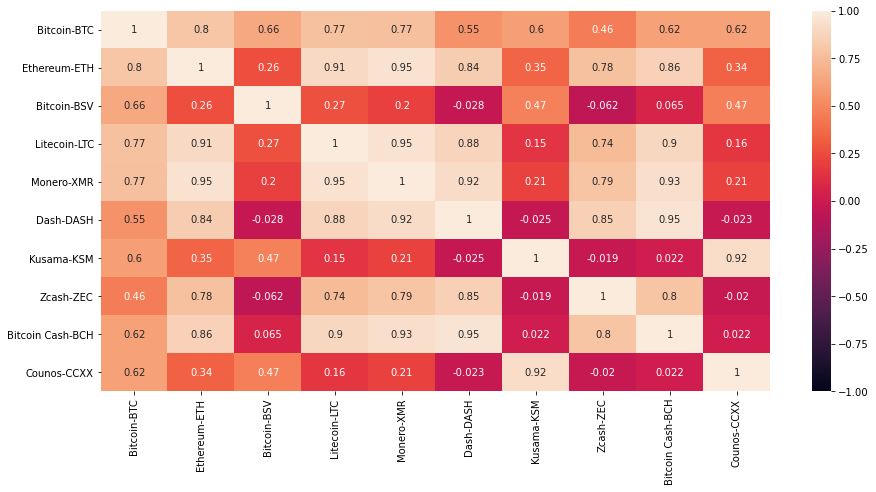

In [174]:
# Plot correlation w/ seaborn
plt.figure(figsize = (15,7))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

In [162]:
# Calculate rolling stats: asses the risk over time
all_roll_std = all_date_index.rolling(window=30).std()

<AxesSubplot:title={'center':'Crypto 30 Day Rolling Standard Deviation'}, xlabel='Date'>

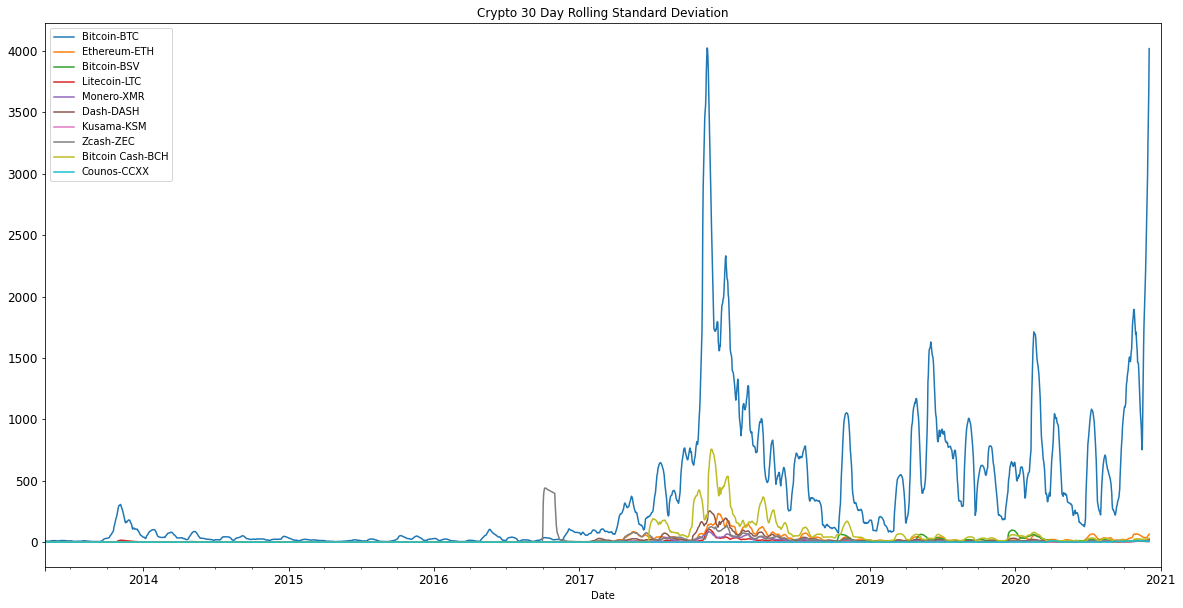

In [196]:
# Plot the rolling standard deviation
all_roll_std.plot(figsize=(20, 10), title="Crypto 30 Day Rolling Standard Deviation", fontsize=12)